In [105]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [106]:
bits = 1024
L = 16  # sample points per multiplication
r = 16  # traces

In [107]:
# generate test data
G = np.random.randint(100, size=(r, L * bits))

with open('traces.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for i in range(r):
        writer.writerow(G[i])

In [108]:
G, G.shape

(array([[21, 55, 80, ..., 43, 22, 28],
        [85, 66, 48, ..., 90, 65,  5],
        [58, 78, 95, ..., 57, 30, 92],
        ...,
        [96, 74, 47, ..., 18, 78, 68],
        [84, 36, 85, ..., 68, 65, 79],
        [17, 52, 58, ..., 77, 61, 73]]),
 (16, 16384))

In [109]:
row_list = []
with open('traces.csv', newline='') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        row_list.append(row)
X = np.array(row_list, dtype='int32')
X

array([[21, 55, 80, ..., 43, 22, 28],
       [85, 66, 48, ..., 90, 65,  5],
       [58, 78, 95, ..., 57, 30, 92],
       ...,
       [96, 74, 47, ..., 18, 78, 68],
       [84, 36, 85, ..., 68, 65, 79],
       [17, 52, 58, ..., 77, 61, 73]])

In [110]:
def denoise(X, inst_seq, measurement):
    # TODO: preprocess the power trace to reduce the noise
    # noise = some_fun(X, inst_seq, measurement)
    noise = np.zeros(X.shape, dtype='int32')
    X -= noise
    return X

X = denoise(X, None, None)
X

array([[21, 55, 80, ..., 43, 22, 28],
       [85, 66, 48, ..., 90, 65,  5],
       [58, 78, 95, ..., 57, 30, 92],
       ...,
       [96, 74, 47, ..., 18, 78, 68],
       [84, 36, 85, ..., 68, 65, 79],
       [17, 52, 58, ..., 77, 61, 73]])

In [111]:
CT = np.zeros((bits, L))
CT.shape

(1024, 16)

In [112]:
for j in range(0, bits):
    for i in range(0, L):
        CT[j,i] = np.corrcoef(X[:,i], X[:,j*L+i])[0,1]
CT

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 2.58551663e-01,  3.17694727e-01, -2.27375483e-01, ...,
        -1.29135040e-01, -1.66804484e-01, -2.53232481e-01],
       [ 2.42334443e-02,  1.67525895e-01,  2.41847833e-01, ...,
        -3.53301106e-01,  9.57253101e-02,  1.50488128e-01],
       ...,
       [ 3.10315276e-01, -5.51277945e-02, -1.29927189e-01, ...,
         4.68049317e-02, -2.89211431e-02,  5.99224242e-01],
       [ 1.50075687e-01, -2.66387174e-01,  1.19055030e-01, ...,
        -2.39945260e-01,  1.31462454e-01,  7.70002687e-02],
       [-4.64546334e-01,  6.45632199e-03, -6.80676273e-01, ...,
        -5.07280595e-04,  8.42442826e-02, -1.38251023e-01]])

In [113]:
V = np.zeros(L)
V.shape

(16,)

In [114]:
for i in range(0, L):
    V[i] = np.var(CT[:,i])
V

array([0.06886291, 0.06859485, 0.067851  , 0.06597235, 0.07047041,
       0.06753918, 0.06360892, 0.06393298, 0.06600095, 0.06505178,
       0.0690672 , 0.06863887, 0.06771762, 0.06935284, 0.06399366,
       0.06660998])

In [115]:
threshold = np.mean(V)  # 先简单取一个
threshold

0.06707909327841213

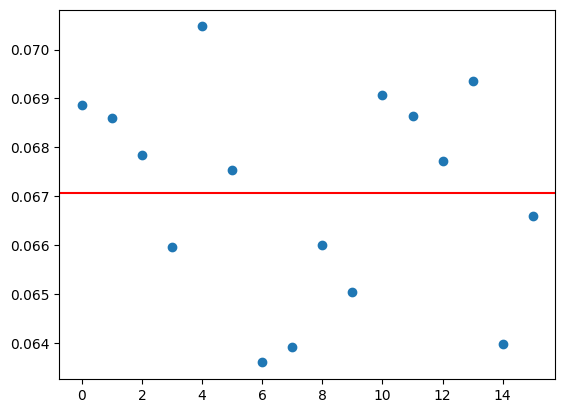

In [116]:
plt.scatter(range(0,L),V)
plt.axhline(y=threshold,c='red')
plt.show()

In [117]:
S = V>threshold
S

array([ True,  True,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True, False, False])

In [118]:
CT_sel = CT[:,S]
CT_sel, CT_sel.shape

(array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 2.58551663e-01,  3.17694727e-01, -2.27375483e-01, ...,
          3.41138792e-02,  1.29520900e-02, -1.29135040e-01],
        [ 2.42334443e-02,  1.67525895e-01,  2.41847833e-01, ...,
          6.91195658e-02, -4.20340362e-02, -3.53301106e-01],
        ...,
        [ 3.10315276e-01, -5.51277945e-02, -1.29927189e-01, ...,
          3.82037921e-02, -6.70779405e-01,  4.68049317e-02],
        [ 1.50075687e-01, -2.66387174e-01,  1.19055030e-01, ...,
         -2.95161077e-01,  3.40585888e-01, -2.39945260e-01],
        [-4.64546334e-01,  6.45632199e-03, -6.80676273e-01, ...,
          9.69135500e-02,  2.32931309e-03, -5.07280595e-04]]),
 (1024, 9))

In [119]:
cor_sum = np.sum(CT_sel, 1)
cor_sum

array([ 9.        ,  0.26826049, -0.01761794, ..., -0.40459305,
       -0.2749364 , -1.36042129])

In [120]:
cor_2avg = cor_sum[1:].mean()
cor_2avg

0.008818370034176555

In [121]:
# if the first bit is 0
s = ''
for cor in cor_sum:
    if cor > cor_2avg:
        s += '0'
    else:
        s += '1'
print(s)

0010100001001111011101100000100110111101011111001101110110101101111001111010010001101010011101011000111010101111001010110001111000111101100110100101010110000010001110111010011001000000100001010101110110000000010110000100110110111000010100100001001111110001100101100110010101101000100000010100001110000100110100011110001010000010101000111000011100010011101101011101000011101100001110101010111111111000110000100101110110110100110000000010001011000101010110001000000010111000010010111101001010110001010100000000110101101111011111101100000100010110001011100101011000100010101100101101111001001001010001000011001110100110110100111001000100010000010100100001010110011101001100110100111011011011001111111101000010101010110100001100001101110000111101110110010010011011001100100100110111000111111101000011111011011011001100100001110101011111111110101101001001110111101111100100000001101001011001010011111001110010110000100000101100010011110111100011011101011101110000010000011001010111100101100101111001010110